In [13]:
from utils import load_video
from simulation import multiplex_v2, multiplex_v3
from matplotlib import pyplot as plt
import numpy as np
import torch
import cv2
import os
from time import time
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
path = '/scratch/ondemand23/mrsalehi/original_high_fps_videos/720p_240fps_1.mov'
subframes = load_video(path)

In [3]:
subframes.shape

(742, 720, 1280)

In [4]:
subframe = subframes[0]

In [5]:
from matplotlib import pyplot as plt

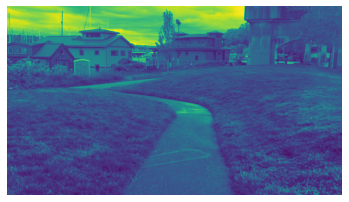

In [7]:
plt.axis('off')
plt.imshow(subframe)
plt.show()

### Loading the video

In [15]:
path = '/scratch/ondemand23/mrsalehi/original_high_fps_videos/720p_240fps_1.mov'
subframes = load_video(path)
subframes = torch.FloatTensor(subframes).cuda()

### Simulation

In [16]:
S = 5
W = torch.FloatTensor([[1, 1, 0, 0, 0], [1, 0, 1, 0, 0], [1, 0, 0, 1, 0], [1, 0, 0, 0, 1]]).cuda()
path = '/scratch/ondemand23/mrsalehi/original_high_fps_videos/720p_240fps_1.mov'

subframes = subframes[50:50+S]  # picking S subframes
height, width = subframes.shape[1], subframes.shape[2]

nbhds = [[(2*i, 2*j), (2*i, 2*j+1), (2*i+1, 2*j), (2*i+1, 2*j+1)] \
    for i in range(int(height / 2)) for j in range(int(width / 2))]

nbhds_rows = torch.LongTensor([[el[0] for el in nbhd] for nbhd in nbhds]).cuda()
nbhds_cols = torch.LongTensor([[el[1] for el in nbhd] for nbhd in nbhds]).cuda()

start = time()
c2b_frame_bucket0, c2b_frame_bucket1 = multiplex_v2(subframes, W, nbhds_rows, nbhds_cols)
end = time()

print(f'Simulation took {end - start} seconds')

First for loop took 6.942519664764404 seconds
Gather took 0.018047571182250977 seconds
Matrix multiplication took 0.018047571182250977 seconds
Second for loop took 10.671408891677856 seconds
Simulation took 18.30742907524109 seconds


In [22]:
# c2b_frame_bucket0 = c2b_frame_bucket0.cpu().numpy()
c2b_frame_bucket1 = c2b_frame_bucket1.cpu().numpy()

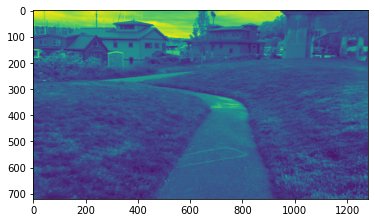

In [23]:
plt.imshow(c2b_frame_bucket1);

In [68]:
W = torch.FloatTensor([[[1, 1, 0], [1, 1, 1]], [[0 ,0, 0], [1, 0, 1]]]).cuda()
subframes = torch.FloatTensor([[[1, 1, 1], [1, 0, 0]], [[0 ,0, 0], [0, 0, 1]]]).cuda()

In [69]:
c2b_bucket0, c2b_bucket1 = multiplex_v3(subframes, W)

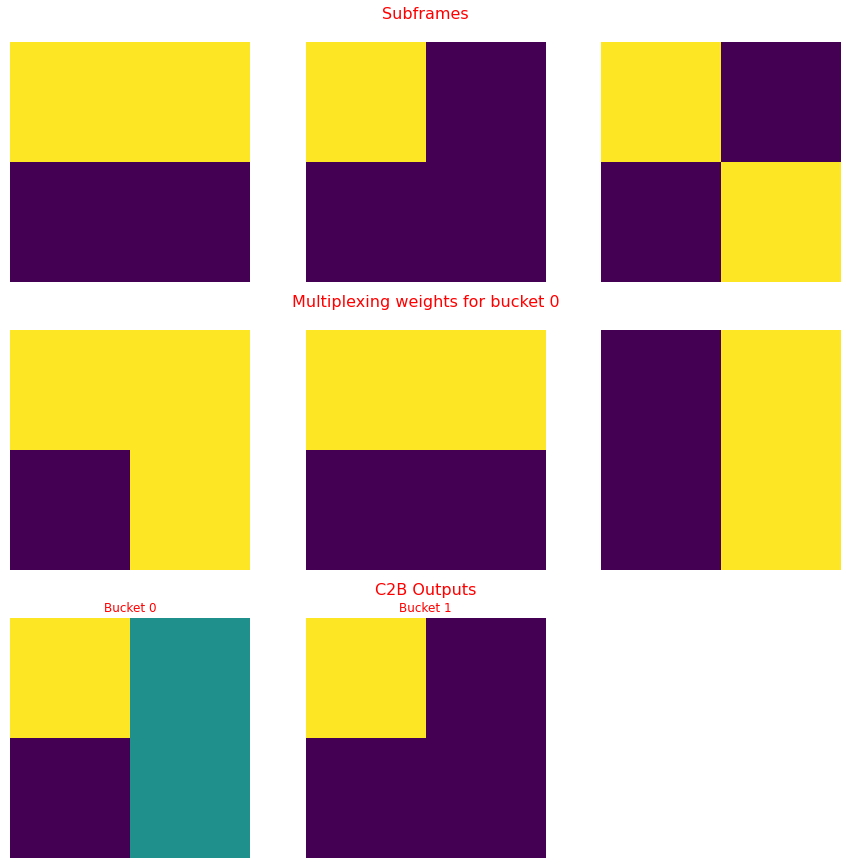

In [70]:
S = W.shape[2]

fig, big_axes = plt.subplots(figsize=(15.0, 15.0) , nrows=3, ncols=1, sharey=True)

big_titles = ['Subframes', 'Multiplexing weights for bucket 0', 'C2B Outputs']

for row, big_ax in enumerate(big_axes, start=1):
    big_ax.set_title(f'{big_titles[row - 1]}\n', fontsize=16, color='red')

    # Turn off axis lines and ticks of the big subplot 
    # obs alpha is 0 in RGBA string!
    big_ax.tick_params(labelcolor=(1.,1.,1., 0.0), top='off', bottom='off', left='off', right='off')
    big_ax.axis('off')
    # removes the white frame
    big_ax._frameon = False


# for i in range(1,10):
#     ax = fig.add_subplot(3,3,i)
#     ax.set_title('Plot title ' + str(i))
    
# figure, axs = plt.subplots(1, 3)

for i in range(0, 3):
    ax1 = fig.add_subplot(3,3,i+1)
    ax1.imshow(subframes[..., i].cpu().numpy())
    ax1.axis('off')
    
    ax2 = fig.add_subplot(3,3,i+4)
    ax2.imshow(W[..., i].cpu().numpy())
    ax2.axis('off')
    
    
ax1 = fig.add_subplot(3, 3, 7)
ax1.imshow(c2b_bucket0.cpu().numpy())
ax1.set_title('Bucket 0', color='red')
ax1.axis('off')

ax2 = fig.add_subplot(3, 3, 8)
ax2.imshow(c2b_bucket1.cpu().numpy())
ax2.set_title('Bucket 1', color='red')
ax2.axis('off')
    

plt.savefig('vis1.png')
    
# for i in range(0, 3):
#     ax = fig.add_subplot(3,3,i+4)
#     ax.imshow(W[..., i].cpu().numpy())
#     ax.axis('off')
    
    
# for i in range(0, 3):
#     ax = fig.add_subplot(3,3,i+4)
#     ax.imshow(W[..., i].cpu().numpy())
#     ax.axis('off')

# for i in range(1,10):
#     ax = fig.add_subplot(3,3,i)
#     ax.imshow()
#     ax.set_title('Plot title ' + str(i))
#     ax.axis('off')

# for i in range(S):
#     W_s = W[..., i]
#     W_s_np = W_s.cpu().numpy()
#     axs[i].axis('off')
#     axs[i].imshow(W_s_np)

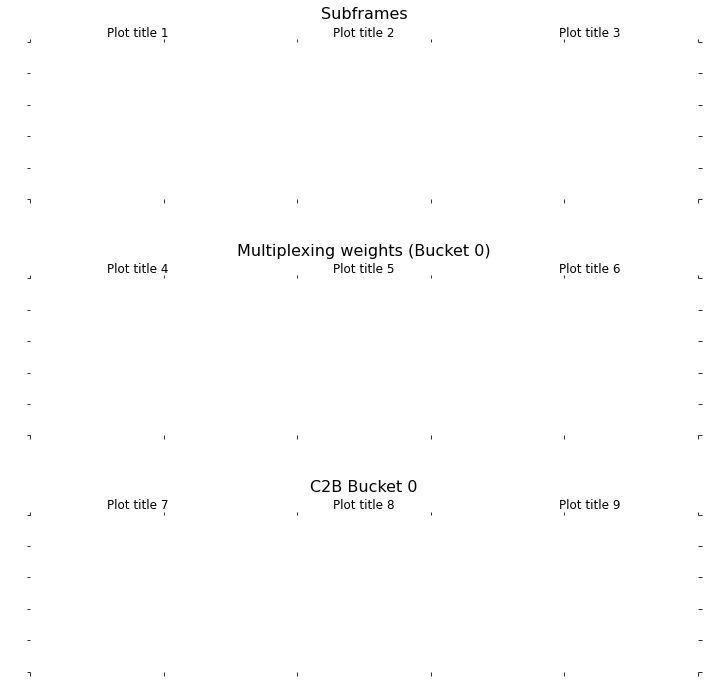

In [33]:
import matplotlib.pyplot as plt

fig, big_axes = plt.subplots( figsize=(10.0, 10.0) , nrows=3, ncols=1, sharey=True) 

big_titles = ['Subframes', 'Multiplexing weights (Bucket 0)', 'C2B Bucket 0']

for row, big_ax in enumerate(big_axes, start=1):
    big_ax.set_title(f'{big_titles[row - 1]}\n', fontsize=16)

    # Turn off axis lines and ticks of the big subplot 
    # obs alpha is 0 in RGBA string!
    big_ax.tick_params(labelcolor=(1.,1.,1., 0.0), top='off', bottom='off', left='off', right='off')
    # removes the white frame
    big_ax._frameon = False


for i in range(1,10):
    ax = fig.add_subplot(3,3,i)
    ax.set_title('Plot title ' + str(i))
    ax.axis('off')

fig.set_facecolor('w')
plt.tight_layout()
plt.show()

## Simulation with NFS Dataset

In [14]:
data_dir = '/scratch/local/2021/mrsalehi/nfs/Gymnastics/240/Gymnastics/'

In [15]:
! ls {data_dir}

00001.jpg  00422.jpg  00843.jpg  01264.jpg  01685.jpg  02106.jpg  02527.jpg
00002.jpg  00423.jpg  00844.jpg  01265.jpg  01686.jpg  02107.jpg  02528.jpg
00003.jpg  00424.jpg  00845.jpg  01266.jpg  01687.jpg  02108.jpg  02529.jpg
00004.jpg  00425.jpg  00846.jpg  01267.jpg  01688.jpg  02109.jpg  02530.jpg
00005.jpg  00426.jpg  00847.jpg  01268.jpg  01689.jpg  02110.jpg  02531.jpg
00006.jpg  00427.jpg  00848.jpg  01269.jpg  01690.jpg  02111.jpg  02532.jpg
00007.jpg  00428.jpg  00849.jpg  01270.jpg  01691.jpg  02112.jpg  02533.jpg
00008.jpg  00429.jpg  00850.jpg  01271.jpg  01692.jpg  02113.jpg  02534.jpg
00009.jpg  00430.jpg  00851.jpg  01272.jpg  01693.jpg  02114.jpg  02535.jpg
00010.jpg  00431.jpg  00852.jpg  01273.jpg  01694.jpg  02115.jpg  02536.jpg
00011.jpg  00432.jpg  00853.jpg  01274.jpg  01695.jpg  02116.jpg  02537.jpg
00012.jpg  00433.jpg  00854.jpg  01275.jpg  01696.jpg  02117.jpg  02538.jpg
00013.jpg  00434.jpg  00855.jpg  01276.jpg  01697.jpg  02118.jpg  02539.jpg
00014.jpg  0

In [16]:
FRAME_RATE = 30
S = 8  # 240 / 30

In [17]:
subframes = []
for i in range(1, 9):
    fname = "0" * (5 - len(str(i))) + str(i) + ".jpg"
    img = cv2.imread(os.path.join(data_dir, fname))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    subframes.append(img)

subframes = np.stack(subframes, axis=2)

In [18]:
subframes = torch.FloatTensor(subframes).cuda()
W = torch.FloatTensor([[[1, 0, 0, 0, 1, 0, 0, 0], 
                        [0, 1, 0, 0, 0, 1, 0, 0]], 
                       [[0, 0, 1, 0, 0, 0, 1, 0], 
                        [0, 0, 0, 1, 0, 0, 0, 1]]]).cuda()

(1280, 720)


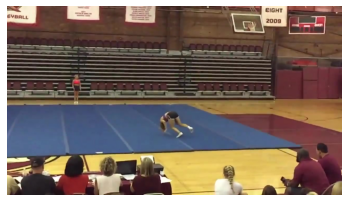

In [19]:
from PIL import Image

img = Image.open(os.path.join(data_dir, '01691.jpg'))
print(img.size)
plt.axis('off')
plt.imshow(img);

In [22]:
c2b_bucket0, c2b_bucket1 = multiplex_v3(subframes, W)

720 1280
2 2
torch.Size([720, 1280, 8])


In [24]:
c2b_bucket0_np = c2b_bucket0.cpu().numpy()
c2b_bucket1_np = c2b_bucket1.cpu().numpy()

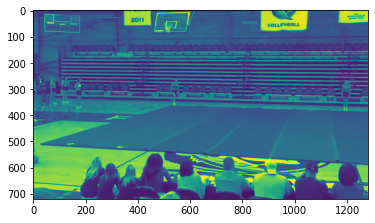

In [25]:
plt.imshow(c2b_bucket0_np)

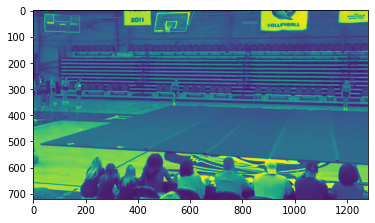

In [26]:
plt.imshow(c2b_bucket1_np)